In [56]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
#warnings.filterwarnings("ignore")
matplotlib.rcParams['axes.labelsize'] 
matplotlib.rcParams['xtick.labelsize'] 
matplotlib.rcParams['ytick.labelsize'] 
matplotlib.rcParams['text.color'] = 'k'

In [57]:
path_to_data = 'https://raw.githubusercontent.com/bashirmohd/DataSceince/master/Time-series-prediction_production/lond_newy_out.csv'

In [58]:
df = pd.read_csv(path_to_data)

In [59]:
df.head()

,Days,Speed
0,16/10/2018 00:00,241.125777
1,16/10/2018 01:00,244.870237
2,16/10/2018 02:00,287.920252
3,16/10/2018 03:00,184.174207
4,16/10/2018 04:00,204.020466


In [60]:
df.tail()

,Days,Speed
2155,13/01/2019 19:00,91.131893
2156,13/01/2019 20:00,115.617786
2157,13/01/2019 21:00,160.531366
2158,13/01/2019 22:00,122.153071
2159,13/01/2019 23:00,143.393375


In [61]:
df.isnull().sum()
df.dtypes

Days      object
Speed    float64
dtype: object

Text(0.5,1,'Lond_newy_out Link Speed Over Time In Hours')

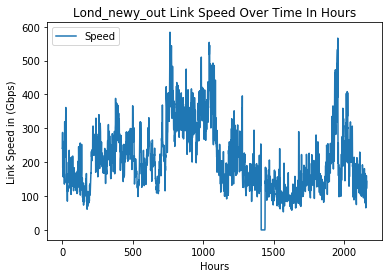

In [63]:
df.plot()
plt.xlabel('Hours')
plt.ylabel('Link Speed in (Gbps)')
plt.title('Lond_newy_out Link Speed Over Time In Hours')

In [64]:
df['Days'] =  pd.to_datetime(df['Days'], infer_datetime_format=True)

In [65]:
df = df.set_index('Days')

In [66]:
average_daily_speed = df.resample('D').mean()

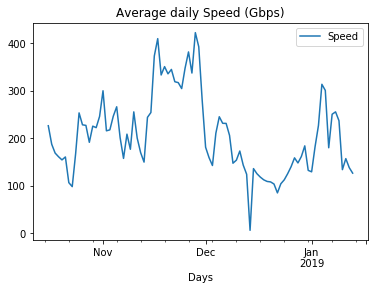

In [67]:
average_daily_speed.plot()
plt.title('Average daily Speed (Gbps)')
plt.show()

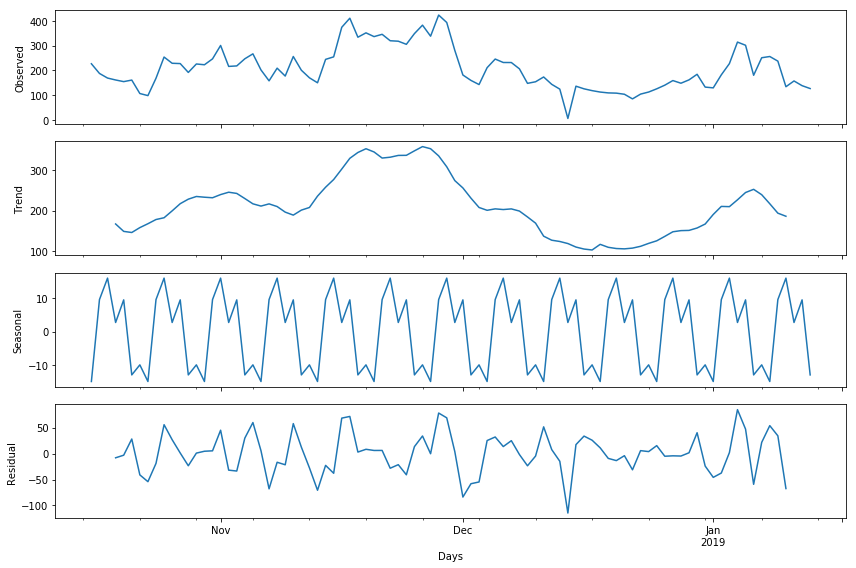

In [68]:
# Seaconal Decomposition of the Network Trace Data
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(average_daily_speed, model='additive')
fig = decomposition.plot()
plt.show()

In [69]:
# Define the p, d and q parameters to take any value between 0 and 2
# Generate all different combinations of p, q and q triplets
# Generate all different combinations of seasonal p, q and q triplets
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [70]:
print('Possible Parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Possible Parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [71]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1218.0095198115373
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1005.0807088107092
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:947.7414068014075
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:792.1405719647001
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:957.6893292082395
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:930.9010927837568
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:816.5865002448286
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:793.0376523877405
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1110.7846498929546
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:931.896597149015
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:890.985081296613
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:738.9444870265245
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:910.1280752596956
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:871.3770705172734
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:775.2401771877686
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:740.8587624822826
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:936.5614737127712
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:813.9614547386874
ARIMA(0, 

In [53]:
#ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:662.0498135423582

In [54]:
mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4769      0.308      1.549      0.121      -0.127       1.081
ma.L1         -0.7178      0.269     -2.673      0.008      -1.244      -0.191
ma.S.L12      -1.0000   1308.115     -0.001      0.999   -2564.859    2562.859
sigma2      1483.3650   1.94e+06      0.001      0.999    -3.8e+06     3.8e+06
